In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [30]:
## Uncomment this and run once per computer
#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt

In [31]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Defining functions for EPMA error as function of beam current and not

In [32]:
def calculate_EPMA_error(Ps_cpsna, B_cpsna, C_Standard, I, t, X):
    sigma=np.sqrt( ( (X*I*Ps_cpsna)/C_Standard + 2*B_cpsna*I)
                   /( ((X*I*Ps_cpsna)/C_Standard)**2*t))
    return sigma

In [33]:
def calculate_EPMA_error_fixedCurrent(Ps_cps, B_cps, C_Standard, t, X):
    sigma=np.sqrt( ( (X*Ps_cps)/C_Standard + 2*B_cps)
                   /( ((X*Ps_cps)/C_Standard)**2*t))
    return sigma

## Loading in Krawzinski error data

In [34]:
# This is data from 2007
Kraw_07=pd.read_excel('Supporting_Data_3.xlsx', sheet_name='Kraw13_042907_Analyses')
# This is data from 2006
Kraw_06=pd.read_excel('Supporting_Data_3.xlsx', sheet_name='Kraw13_083006_Analyses')

In [35]:
# This splits estimates up by phase
# We are using both Cpx and Opx as this gives us a better measure of how things change at lower concentrations
Kraw_07_Cpx=Kraw_07.loc[(Kraw_07['Phase']=="cpx")] #| (Kraw_07['Phase']=="opx")]
Kraw_06_Cpx=Kraw_06.loc[(Kraw_06['Phase']=="cpx")]# (Kraw_06['Phase']=="opx")]

Kraw_07_Cpx_Na=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="Na2O"]
Kraw_06_Cpx_Na=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="Na2O"]

Kraw_07_Cpx_Al=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="Al2O3"]
Kraw_06_Cpx_Al=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="Al2O3"]

Kraw_07_Cpx_Si=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="SiO2"]
Kraw_06_Cpx_Si=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="SiO2"]

Kraw_07_Cpx_Ti=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="TiO2"]
Kraw_06_Cpx_Ti=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="TiO2"]

Kraw_07_Cpx_Mn=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="MnO"]
Kraw_06_Cpx_Mn=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="MnO"]

Kraw_07_Cpx_Mg=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="MgO"]
Kraw_06_Cpx_Mg=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="MgO"]

Kraw_07_Cpx_Fe=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="FeO"]
Kraw_06_Cpx_Fe=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="FeO"]

Kraw_07_Cpx_Ca=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="CaO"]
Kraw_06_Cpx_Ca=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="CaO"]


Kraw_07_Amp=Kraw_07.loc[Kraw_07['Phase']=="amp"]
Kraw_06_Amp=Kraw_06.loc[Kraw_06['Phase']=="amp"]

Kraw_07_Amp_Na=Kraw_07_Amp.loc[Kraw_07_Amp['Element']=="Na2O"]
Kraw_06_Amp_Na=Kraw_06_Amp.loc[Kraw_06_Amp['Element']=="Na2O"]

Kraw_06_Cali=pd.read_excel('Supporting_Data_3.xlsx', 
                           sheet_name='Kraw13_083006_Cali')
Kraw_06_Cali_Na5=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Na5-1"]
Kraw_06_Cali_Al2=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Al2"]
Kraw_06_Cali_Mg2=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Mg2"]
Kraw_06_Cali_Fe3=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Fe3"]
Kraw_06_Cali_Ti4=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Ti4"]
Kraw_06_Cali_Mn4=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Mn4"]

## Information on a primary calibration for Augite at Oregon State University (kindly provided by probe technician Marie Takach)

In [36]:
Tak_Cali=pd.read_excel('Supporting_Data_3.xlsx', 
                       sheet_name='OSU_Standard_Info')
Tak_Cali_Na=Tak_Cali.loc[Tak_Cali['Element']=="Na"]
Tak_Cali_Al=Tak_Cali.loc[Tak_Cali['Element']=="Al"]
Tak_Cali_Si=Tak_Cali.loc[Tak_Cali['Element']=="Si"]
Tak_Cali_Mg=Tak_Cali.loc[Tak_Cali['Element']=="Mg"]
Tak_Cali_Fe=Tak_Cali.loc[Tak_Cali['Element']=="Fe"]
Tak_Cali_Ca=Tak_Cali.loc[Tak_Cali['Element']=="Ca"]


## Loading in precision vs. concentration information from Bristol
- Spreadsheet kindly provided by Ben Buse

In [37]:
Buse=pd.read_excel('Supporting_Data_3.xlsx', 
                   sheet_name='Bristol_Prec_Conc')

In [38]:
Buse

,wt% Na,Error_60,Error_100,Error_400,Unnamed: 4,"Shows the % error for 60s, 100s, and 400s"
0,0.01,195.810436,151.674111,75.837056,NaN,NaN
1,0.02,101.341711,78.498952,39.249476,NaN,NaN
2,0.03,69.776956,54.048998,27.024499,NaN,NaN
3,0.04,53.943405,41.784382,20.892191,NaN,NaN
4,0.05,44.405899,34.396662,17.198331,NaN,NaN
5,0.06,38.018979,29.449375,14.724687,NaN,NaN
6,0.07,33.434304,25.898101,12.949050,NaN,NaN
7,0.08,29.977498,23.220470,11.610235,NaN,NaN
8,0.10,25.098070,19.440881,9.720441,NaN,NaN
9,0.12,21.805484,16.890455,8.445228,NaN,NaN


## Loading in Neave Error data

In [39]:
Neave_18=pd.read_excel('Supporting_Data_3.xlsx', 
                       sheet_name='Neave19_20180718_Python')
#Neave_19=pd.read_excel(r'../Kraw_2013_Calibration_Errors.xlsx', sheet_name='083006_Analyses')

Neave_sigma=pt.import_excel('Supporting_Data_3.xlsx', 
                       sheet_name='Neave19_20180718_Python',
                           suffix="_Cpx")
Neave_sigma_in=Neave_sigma['my_input']
Neave_sigma_Cpx=Neave_sigma['Cpxs']
Neave_conv=pt.convert_oxide_percent_to_element_weight_percent(df=Neave_sigma_Cpx,
                                        suffix='_Cpx', without_oxygen=True)

Pec_Err_Neave_Na=100*Neave_sigma_in['Na_sig']/Neave_conv['Na_wt_noO2']
Pec_Err_Neave_Al=100*Neave_sigma_in['Al_sig']/Neave_conv['Al_wt_noO2']
Pec_Err_Neave_Ti=100*Neave_sigma_in['Ti_sig']/Neave_conv['Ti_wt_noO2']
Pec_Err_Neave_Ca=100*Neave_sigma_in['Ca_sig']/Neave_conv['Ca_wt_noO2']
Pec_Err_Neave_Fe=100*Neave_sigma_in['Fe_sig']/Neave_conv['Fe_wt_noO2']
Pec_Err_Neave_Mn=100*Neave_sigma_in['Mn_sig']/Neave_conv['Mn_wt_noO2']
Pec_Err_Neave_Mg=100*Neave_sigma_in['Mg_sig']/Neave_conv['Mg_wt_noO2']

## Function for calculating EPMA errors using count rates

In [40]:

XNa=np.linspace(0.01, 3, 200)
XAl=np.linspace(0.01, 7, 200)
XFe=np.linspace(0.01, 15, 200)
XMg=np.linspace(0.01, 15, 200)
XTi=np.linspace(0.01, 0.8, 200)
XMn=np.linspace(0.01, 0.2, 200)

# Kraw Probe Stuff
EPMA_Kraw_Na_06_10na_10s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=10, t=10, X=XNa)
EPMA_Kraw_Na_06_10na_15s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=10, t=15, X=XNa)
EPMA_Kraw_Na_06_10na_30s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=10, t=30, X=XNa)

# These are the conditions mike uses
EPMA_Kraw_Al_06_10na_40s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Al2['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Al2['B'].values,
                                C_Standard=Kraw_06_Cali_Al2['Conc_Standard_Elwt'].values,
                                I=10, t=40, X=XAl)

# david only uses 20 s
EPMA_Kraw_Al_06_10na_20s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Al2['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Al2['B'].values,
                                C_Standard=Kraw_06_Cali_Al2['Conc_Standard_Elwt'].values,
                                I=10, t=20, X=XAl)

EPMA_Kraw_Mg_06_10na_40s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Mg2['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Mg2['B'].values,
                                C_Standard=Kraw_06_Cali_Mg2['Conc_Standard_Elwt'].values,
                                I=10, t=40, X=XMg)

EPMA_Kraw_Fe_06_10na_40s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Fe3['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Fe3['B'].values,
                                C_Standard=Kraw_06_Cali_Fe3['Conc_Standard_Elwt'].values,
                                I=10, t=40, X=XFe)

EPMA_Kraw_Mn_06_10na_40s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Mn4['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Mn4['B'].values,
                                C_Standard=Kraw_06_Cali_Mn4['Conc_Standard_Elwt'].values,
                                I=10, t=40, X=XMn)

EPMA_Kraw_Ti_06_10na_40s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Ti4['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Ti4['B'].values,
                                C_Standard=Kraw_06_Cali_Ti4['Conc_Standard_Elwt'].values,
                                I=10, t=40, X=XTi)
# Takach -OSU Stuff

EPMA_Tak_Na_10na_10s=calculate_EPMA_error(Ps_cpsna=Tak_Cali_Na['P-B'].values,
                                B_cpsna=Tak_Cali_Na['B'].values,
                                C_Standard=Tak_Cali_Na['Conc_Standard_Elwt'].values,
                                I=10, t=10, X=XNa)
EPMA_Tak_Fe_10na_10s=calculate_EPMA_error(Ps_cpsna=Tak_Cali_Fe['P-B'].values,
                                B_cpsna=Tak_Cali_Fe['B'].values,
                                C_Standard=Tak_Cali_Fe['Conc_Standard_Elwt'].values,
                                I=10, t=10, X=XFe)

EPMA_Tak_Al_10na_10s=calculate_EPMA_error(Ps_cpsna=Tak_Cali_Al['P-B'].values,
                                B_cpsna=Tak_Cali_Al['B'].values,
                                C_Standard=Tak_Cali_Al['Conc_Standard_Elwt'].values,
                                I=10, t=10, X=XAl)

Na2O_to_Na_Factor=(2*22.989769 /61.9789)
Al2O3_to_Al_Factor=(2*26.981539 /101.96)
MgO_to_Mg_Factor=(24.305 /40.3044)
FeO_to_Fe_Factor=(55.845 /71.844)
TiO2_to_Ti_Factor=(47.867 /79.866)
MnO_to_Mn_Factor=(54.938044 /70.9374)

In [41]:
EPMA_Kraw_Na_06_6na_10s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=6, t=10, X=XNa)

EPMA_Kraw_Na_06_20na_20s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=20, t=20, X=XNa)

In [42]:
EPMA_Kraw_Na_06_10na_15s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=10, t=15, X=XNa)

In [43]:
EPMA_Kraw_Na_06_10na_10s=calculate_EPMA_error(Ps_cpsna=Kraw_06_Cali_Na5['P-B'].values,
                                B_cpsna=Kraw_06_Cali_Na5['B'].values,
                                C_Standard=Kraw_06_Cali_Na5['Conc_Standard_Elwt'].values,
                                I=10, t=10, X=XNa)

# Krawzinski real scatter based on experiments

In [44]:
KrawIn=pd.read_excel('Supporting_Data_2.xlsx', 
                     sheet_name="Phases_sigma", index_col=False)

Cpx_N5=KrawIn.loc[KrawIn['Phase_original']=="cpx"]
Opx_N5=KrawIn.loc[KrawIn['Phase_original']=="opx"]
Ol_N5=KrawIn.loc[KrawIn['Phase_original']=="Oliv"]
Plag_N5=KrawIn.loc[KrawIn['Phase_original']=="plag"]
Glass_N5=KrawIn.loc[KrawIn['Phase_original']=="Glass"]
Mag_N5=KrawIn.loc[KrawIn['Phase_original']=="mag"]
Sp_N5=KrawIn.loc[KrawIn['Phase_original']=="sp"]
Amp_N5=KrawIn.loc[KrawIn['Phase_original']=="Amph"]


## Compilation of probe currents in literatre

In [45]:
probe_curr=pd.read_excel('Supporting_Data_3.xlsx', sheet_name='Lit_Current_Compilation')

## Loading in Gleeson Error Data

In [46]:
Gleeson_sigma=pt.import_excel('Supporting_Data_3.xlsx',
                              sheet_name='Gleeson_SX100_Prec', suffix="_Cpx")
Gleeson_sigma_in=Gleeson_sigma['my_input']
Gleeson_sigma_Cpx=Gleeson_sigma['Cpxs']

Gleeson_conv=pt.convert_oxide_percent_to_element_weight_percent(df=Gleeson_sigma_Cpx, suffix='_Cpx', without_oxygen=True)

Pec_Err_Na=100*Gleeson_sigma_in['Na']/Gleeson_conv['Na_wt_noO2']
Pec_Err_Al=100*Gleeson_sigma_in['Al']/Gleeson_conv['Al_wt_noO2']
Pec_Err_Ti=100*Gleeson_sigma_in['Ti']/Gleeson_conv['Ti_wt_noO2']
Pec_Err_Ca=100*Gleeson_sigma_in['Ca']/Gleeson_conv['Ca_wt_noO2']
Pec_Err_Fe=100*Gleeson_sigma_in['Fe']/Gleeson_conv['Fe_wt_noO2']

## Loading in Takach data for Kaknui Aug

In [47]:
Tak_sigma=pt.import_excel('Supporting_Data_3.xlsx', 
                          sheet_name='OSU_Precision', suffix="_Cpx")
Tak_sigma_in=Tak_sigma['my_input']
Tak_sigma_Cpx=Tak_sigma['Cpxs']
Tak_conv=pt.convert_oxide_percent_to_element_weight_percent(df=Tak_sigma_Cpx, suffix='_Cpx', without_oxygen=True)

Pec_Err_Na_OSU=100*Tak_sigma_in['Na_std']/Tak_conv['Na_wt_noO2']
Pec_Err_Al_OSU=100*Tak_sigma_in['Al_std']/Tak_conv['Al_wt_noO2']
Pec_Err_Ti_OSU=100*Tak_sigma_in['Ti_std']/Tak_conv['Ti_wt_noO2']
Pec_Err_Ca_OSU=100*Tak_sigma_in['Ca_std']/Tak_conv['Ca_wt_noO2']
Pec_Err_Fe_OSU=100*Tak_sigma_in['Fe_std']/Tak_conv['Fe_wt_noO2']

## Loading in LEPR data to show Error distribution

In [48]:
LEPR_Stitched2=pd.read_excel('Supporting_Data_4.xlsx', sheet_name='Clinopyroxene')
LEPR_Exp=pd.read_excel('Supporting_Data_4.xlsx', sheet_name='Experiment')
LEPR_Stitched1=LEPR_Stitched2.merge(LEPR_Exp, how='right', on='Experiment')


In [49]:
Cpx_comps=(LEPR_Stitched1['CaO value']/56.0774)/((LEPR_Stitched1['CaO value']/56.0774)+ (LEPR_Stitched1['MgO value']/40.3044)+(LEPR_Stitched1['FeO value']/71.84))
LEPR_Stitched=LEPR_Stitched1.loc[ (Cpx_comps.between(0.2, 0.5)) & (LEPR_Stitched1['P (GPa)']<1)].reset_index(drop=True)

LEPR_Cpx=pd.DataFrame(data={'SiO2_Cpx': LEPR_Stitched['SiO2 value'], 
                            'TiO2_Cpx': LEPR_Stitched['TiO2 value'],
                             'Al2O3_Cpx':LEPR_Stitched['Al2O3 value'],
                             'FeOt_Cpx':LEPR_Stitched['FeO value'],
                            'MnO_Cpx':LEPR_Stitched['MnO value'],
                            'MgO_Cpx':LEPR_Stitched['MgO value'],
                            'CaO_Cpx':LEPR_Stitched['CaO value'],
                            'Na2O_Cpx': LEPR_Stitched['Na2O value'] ,
                            'Cr2O3_Cpx':LEPR_Stitched['Cr2O3 value'],
                               'K2O_Cpx':LEPR_Stitched['K2O value'] })

In [50]:
LEPR_Components=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx)
LEPR_Components_AlJd=LEPR_Components.loc[LEPR_Components['Jd_from 0=Na, 1=Al']==1]
LEPR_Components_NaJd=LEPR_Components.loc[LEPR_Components['Jd_from 0=Na, 1=Al']==0]
LEPR_AlJd=LEPR_Stitched.loc[LEPR_Components['Jd_from 0=Na, 1=Al']==1]
LEPR_NaJd=LEPR_Stitched.loc[LEPR_Components['Jd_from 0=Na, 1=Al']==0]

print(len(LEPR_Components_AlJd))
print(len(LEPR_Components_NaJd))
print(100*len(LEPR_Components_AlJd)/(len(LEPR_Components_AlJd)+len(LEPR_Components_NaJd)))

185
1846
9.10881339241753


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


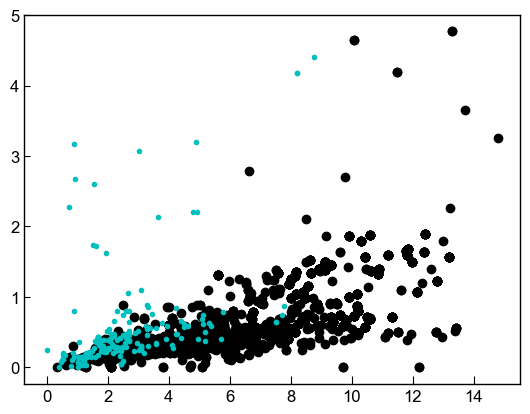

In [51]:

plt.plot(LEPR_Components_NaJd['Al2O3_Cpx'], LEPR_Components_NaJd['Na2O_Cpx'], 'ok')
plt.plot(LEPR_Components_AlJd['Al2O3_Cpx'], LEPR_Components_AlJd['Na2O_Cpx'], '.c')

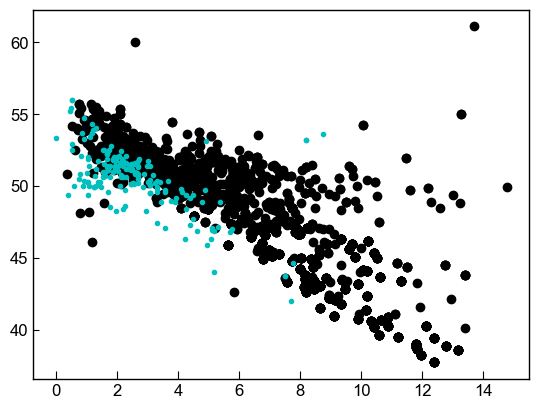

In [52]:

plt.plot(LEPR_Components_NaJd['Al2O3_Cpx'], LEPR_Components_NaJd['SiO2_Cpx'], 'ok')
plt.plot(LEPR_Components_AlJd['Al2O3_Cpx'], LEPR_Components_AlJd['SiO2_Cpx'], '.c')

## Neave's experiments - Mean and standard deviation of 

In [53]:
out_2nd_NExp=pt.import_excel('Supporting_Data_5.xlsx',
                             sheet_name='Neave_Cpx', suffix="_Cpx") 
Cpxs_2nd_NExp=out_2nd_NExp['Cpxs']
input_2nd_NExp=out_2nd_NExp['my_input']

cpx_comp_2nd_NExp=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_2nd_NExp)
All_NExp=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_2nd_NExp)
All_NExp['P_kbar_x']=input_2nd_NExp['Pressure(MPa)']/100
All_NExp_9=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0188-9"]
All_NExp_2=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0201-2"]
All_NExp_8=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0187-8"]
All_NExp_4=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0183-4"]
All_NExp_1=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0167-1"]
All_NExp_10=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0184-10"]
All_NExp_Y2=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0205-2"]
All_NExp_Y3=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0200-3"]
All_NExp_Y1=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-1"]
All_NExp_Y7=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0287-1"]
All_NExp_043=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0204-3"]

Cpxs_Exp9=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0188-9"]
Cpxs_Exp2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0201-2"]
Cpxs_Exp8=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0187-8"]
Cpxs_Exp4=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0183-4"]
Cpxs_Exp1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0167-1"]
Cpxs_Exp10=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0184-10"]
Cpxs_ExpY2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0205-2"]
Cpxs_ExpY3=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0200-3"]
Cpxs_ExpY1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-1"]
Cpxs_ExpY27=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-2"]



C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [54]:
Cpxs_Exp9_Mean=Cpxs_Exp9.mean(axis=0).to_frame().T
Cpxs_Exp9_Std=Cpxs_Exp9.std(axis=0).to_frame().T
Prec_Exp9=100*Cpxs_Exp9_Std/Cpxs_Exp9_Mean

Cpxs_Exp2_Mean=Cpxs_Exp2.mean(axis=0).to_frame().T
Cpxs_Exp2_Std=Cpxs_Exp2.std(axis=0).to_frame().T
Prec_Exp2=100*Cpxs_Exp2_Std/Cpxs_Exp2_Mean

Cpxs_Exp8_Mean=Cpxs_Exp8.mean(axis=0).to_frame().T
Cpxs_Exp8_Std=Cpxs_Exp8.std(axis=0).to_frame().T
Prec_Exp8=100*Cpxs_Exp8_Std/Cpxs_Exp8_Mean

Cpxs_Exp4_Mean=Cpxs_Exp4.mean(axis=0).to_frame().T
Cpxs_Exp4_Std=Cpxs_Exp4.std(axis=0).to_frame().T
Prec_Exp4=100*Cpxs_Exp4_Std/Cpxs_Exp4_Mean

Cpxs_Exp1_Mean=Cpxs_Exp1.mean(axis=0).to_frame().T
Cpxs_Exp1_Std=Cpxs_Exp1.std(axis=0).to_frame().T
Prec_Exp1=100*Cpxs_Exp1_Std/Cpxs_Exp1_Mean

Cpxs_Exp10_Mean=Cpxs_Exp10.mean(axis=0).to_frame().T
Cpxs_Exp10_Std=Cpxs_Exp10.std(axis=0).to_frame().T
Prec_Exp10=100*Cpxs_Exp10_Std/Cpxs_Exp10_Mean

Cpxs_ExpY2_Mean=Cpxs_ExpY2.mean(axis=0).to_frame().T
Cpxs_ExpY2_Std=Cpxs_ExpY2.std(axis=0).to_frame().T
Prec_ExpY2=100*Cpxs_ExpY2_Std/Cpxs_ExpY2_Mean

Cpxs_ExpY3_Mean=Cpxs_ExpY3.mean(axis=0).to_frame().T
Cpxs_ExpY3_Std=Cpxs_ExpY3.std(axis=0).to_frame().T
Prec_ExpY3=100*Cpxs_ExpY3_Std/Cpxs_ExpY3_Mean

Cpxs_ExpY1_Mean=Cpxs_ExpY1.mean(axis=0).to_frame().T
Cpxs_ExpY1_Std=Cpxs_ExpY1.std(axis=0).to_frame().T
Prec_ExpY1=100*Cpxs_ExpY1_Std/Cpxs_ExpY1_Mean#

Cpxs_ExpY27_Mean=Cpxs_ExpY27.mean(axis=0).to_frame().T
Cpxs_ExpY27_Std=Cpxs_ExpY27.std(axis=0).to_frame().T
Prec_ExpY27=100*Cpxs_ExpY27_Std/Cpxs_ExpY27_Mean

In [55]:
Neave_Exp_Prec=pd.concat([Prec_Exp9, Prec_Exp2, Prec_Exp8, Prec_Exp4, Prec_Exp1, Prec_Exp10, Prec_ExpY2, Prec_ExpY3, Prec_ExpY1])
Neave_Exp_Mean=pd.concat([Cpxs_Exp9_Mean, Cpxs_Exp2_Mean, Cpxs_Exp8_Mean, Cpxs_Exp4_Mean, Cpxs_Exp1_Mean,
                          Cpxs_Exp10_Mean, Cpxs_ExpY2_Mean, Cpxs_ExpY3_Mean, Cpxs_ExpY1_Mean])


In [56]:
Na2O_to_Na_Factor

0.7418579226155998

## Figure for paper

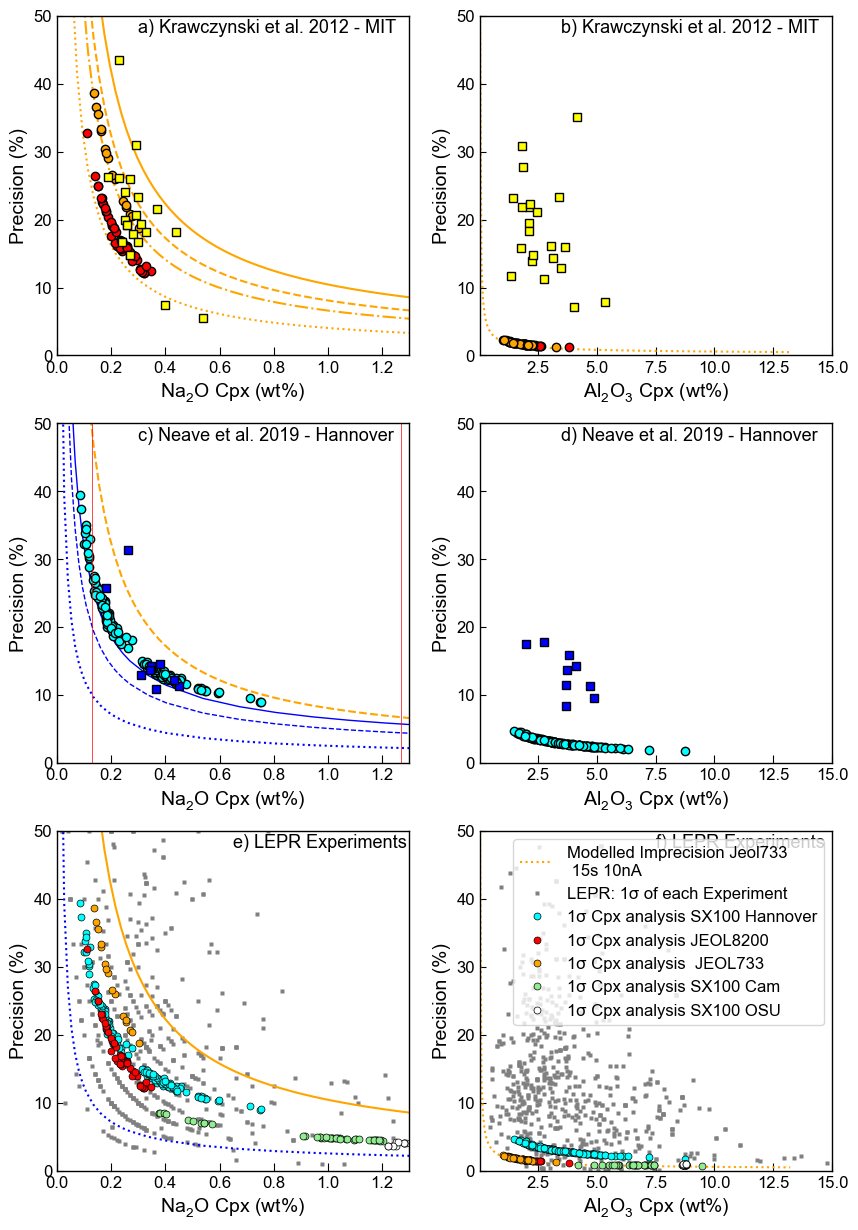

In [59]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,15))
#ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '--r')
# ax1.plot(LEPR_Stitched['Na2O value'], 
#          100*LEPR_Stitched['Na2O error']/LEPR_Stitched['Na2O value'], '.k', ms=1, alpha=0.8)
#ax1.set_title('Krawczynski et al. 2012 - MIT')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_6na_10s, '-', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '--', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '-.', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_20na_20s, ':', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')

ax1.plot(Kraw_07_Cpx_Na['Ox-Wt%'], Kraw_07_Cpx_Na['Error_Per'], 'ok', mfc='r', label='1σ Cpx analysis JEOL8200 ')
ax1.plot(Kraw_06_Cpx_Na['Ox-Wt%'], Kraw_06_Cpx_Na['Error_Per'], 'ok', mfc='orange', label='1σ Cpx analysis JEOL733')
ax1.plot(Cpx_N5['Na2O'], 100*Cpx_N5['Na2O_Err']/Cpx_N5['Na2O'], 'sk', mfc='yellow', label='1σ Experiment')

ax1.set_ylabel('Precision (%)')
ax1.set_xlabel('Na$_2$O Cpx (wt%)')


#ax3.set_title('Neave et al. (2019) - Hannover')
#ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '-b')
ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_400'], ':b')
ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '--b', lw=1)
ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_60'], '-b', lw=1)

ax3.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '--', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')

ax3.plot(Neave_sigma_in['Na2O'], Pec_Err_Neave_Na, 'ok', mfc='cyan', label='1σ Cpx analysis SX100 Hannover')
ax3.plot(Neave_Exp_Mean['Na2O_Cpx'], Neave_Exp_Prec['Na2O_Cpx'], 'sk', mfc='blue', label='1σ Experiment')

ax3.set_xlabel('Na$_2$O Cpx (wt%)')
ax3.set_ylabel('Precision (%)')
#ax3.legend()

#ax5.set_title('LEPR vs. analytical Imprecision')
ax5.plot(LEPR_Stitched['Na2O value'], 100*LEPR_Stitched['Na2O error']/LEPR_Stitched['Na2O value'],
         's', mec='none', mfc='grey', ms=3, label='LEPR: 1σ of each Experiment')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '-k')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '-k')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_30s, '-.k')
#ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_60'], '-b')
ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_400'], ':b')
#ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '--b', lw=1)
#ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_60'], ':b', lw=1)

#plt.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Tak_Na_10na_10s/XNa, '-b')
ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_6na_10s,  '-', color='orange')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_20na_20s_test,  '--', color='orange')
ax3.plot([0.13, 0.13], [0, 50], '-r', lw=0.5)
ax3.plot([1.27, 1.27], [0, 50], '-r', lw=0.5)
ms1=5
mew1=0.5
ax5.plot(Neave_sigma_in['Na2O'], Pec_Err_Neave_Na, 'ok', mfc='cyan', mew=mew1, label='1σ Cpx analysis SX100 Hannover', ms=ms1)
ax5.plot(Kraw_07_Cpx_Na['Ox-Wt%'], Kraw_07_Cpx_Na['Error_Per'], 'ok', mfc='r',mew=mew1, label='1σ Cpx analysis JEOL8200 ', ms=ms1)
ax5.plot(Kraw_06_Cpx_Na['Ox-Wt%'], Kraw_06_Cpx_Na['Error_Per'], 'ok', mfc='orange', mew=mew1,label='1σ Cpx analysis  JEOL733', ms=ms1)
ax5.plot(Gleeson_sigma_Cpx['Na2O_Cpx'], Pec_Err_Na, 'ok', mfc='lightgreen',mew=mew1, label='1σ Cpx analysis SX100 Cam', ms=ms1)
ax5.plot(Tak_sigma_in['Na2O'], Pec_Err_Na_OSU, 'ok', mfc='white', mew=mew1, label='1σ Cpx analysis SX100 OSU', ms=ms1)
rand=np.linspace(0, 290, 30)
#ax5.plot(Mitch['Na2O'].loc[rand],Mitch['Na%ERR'].loc[rand], 'ok', mfc='yellow', ms=4, zorder=0)
# ax5.plot(0.178, 11.1, 'ok', mfc='cornflowerblue',mew=mew1, ms=ms1) # From Blatter, Cpx1
# ax5.plot(0.039, 39.37, 'ok', mfc='cornflowerblue',mew=mew1, ms=ms1) # From Blatter, Kpyrope

ax3.set_ylim([0, 50])
ax3.set_xlim([0, 1.3])
ax5.set_xlabel('Na$_2$O Cpx (wt%)')
ax5.set_ylabel('Precision (%)')
#ax5.legend()

### Al2O3
#ax2.set_title('Krawczynski et al. 2012 - MIT')
ax2.plot(XAl/Al2O3_to_Al_Factor, 
         100*EPMA_Kraw_Al_06_10na_40s, ':', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')



ax2.plot(Kraw_07_Cpx_Al['Ox-Wt%'], Kraw_07_Cpx_Al['Error_Per'], 'ok', mfc='r', label='1σ Cpx analysis JEOL8200 ')
ax2.plot(Kraw_06_Cpx_Al['Ox-Wt%'], Kraw_06_Cpx_Al['Error_Per'], 'ok', mfc='orange', label='1σ Cpx analysis JEOL733')
ax2.plot(Cpx_N5['Al2O3'], 100*Cpx_N5['Al2O3_Err']/Cpx_N5['Al2O3'], 'sk', mfc='yellow', label='1σ Experiment')
ax2.set_ylim([0, 50])
ax2.set_xlim([0, 7.5])
ax2.set_ylabel('Precision (%)')
ax2.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')


#ax4.set_title('Neave et al. (2019) - Hannover')
#ax4.plot(XAl/Al2O3_to_Al_Factor, 
#         100*EPMA_Kraw_Al_06_10na_20s, '-', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax4.plot(Neave_sigma_in['Al2O3'], Pec_Err_Neave_Al, 'ok', mfc='cyan', label='1σ Cpx analysis SX100 Hannover')
ax4.plot(Neave_Exp_Mean['Al2O3_Cpx'], Neave_Exp_Prec['Al2O3_Cpx'], 'sk', mfc='blue', label='1σ Experiment')
ax4.set_ylim([0, 50])
ax4.set_xlim([0, 15])
ax4.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')
ax4.set_ylabel('Precision (%)')


#ax6.set_title('LEPR vs. analytical Imprecision')
ax6.plot(XAl/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_40s, ':', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')

ax6.plot(LEPR_Stitched['Al2O3 value'], 100*LEPR_Stitched['Al2O3 error']/LEPR_Stitched['Al2O3 value'],
         's', mec='none', mfc='grey', ms=3, label='LEPR: 1σ of each Experiment')
#ax6.plot(XNa/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_10s, '-k')
#ax6.plot(XNa/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_15s, '-k')
#ax6.plot(XNa/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_30s, '-.k')
ax6.plot(Neave_sigma_in['Al2O3'], Pec_Err_Neave_Al, 'ok', mfc='cyan', mew=mew1,label='1σ Cpx analysis SX100 Hannover', ms=ms1)
ax6.plot(Kraw_07_Cpx_Al['Ox-Wt%'], Kraw_07_Cpx_Al['Error_Per'], 'ok',mew=mew1, mfc='r', label='1σ Cpx analysis JEOL8200 ', ms=ms1)
ax6.plot(Kraw_06_Cpx_Al['Ox-Wt%'], Kraw_06_Cpx_Al['Error_Per'], 'ok',mew=mew1, mfc='orange', label='1σ Cpx analysis  JEOL733', ms=ms1)
ax6.plot(Gleeson_sigma_Cpx['Al2O3_Cpx'], Pec_Err_Al, 'ok', mfc='lightgreen',mew=mew1, label='1σ Cpx analysis SX100 Cam', ms=ms1)
ax6.plot(Tak_sigma_in['Al2O3'], Pec_Err_Al_OSU, 'ok', mfc='white', mew=mew1, label='1σ Cpx analysis SX100 OSU', ms=ms1)
#ax6.plot(Mitch['Al2O3'].loc[rand],Mitch['Al%ERR'].loc[rand], 'ok', mfc='yellow', ms=4, zorder=0)
ax6.legend()
#ax6.plot(0.626, 20, 'ok', mfc='cornflowerblue', mew=mew1,ms=ms1)
ax6.set_ylim([0, 50])
ax6.set_xlim([0, 15])
ax6.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')
ax6.set_ylabel('Precision (%)')
#plt.tight_layout()

ax1.annotate("a) Krawczynski et al. 2012 - MIT", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax2.annotate("b) Krawczynski et al. 2012 - MIT", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax3.annotate("c) Neave et al. 2019 - Hannover", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax4.annotate("d) Neave et al. 2019 - Hannover", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax5.annotate("e) LEPR Experiments", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=13)
ax6.annotate("f) LEPR Experiments", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=13)
## axislimits

ax1.set_ylim([0, 50])
ax1.set_xlim([0, 1.3])
ax3.set_ylim([0, 50])
ax3.set_xlim([0, 1.3])
ax5.set_ylim([0, 50])
ax5.set_xlim([0, 1.3])


ax2.set_ylim([0, 50])
ax2.set_xlim([0.01, 15])
ax4.set_ylim([0, 50])
ax4.set_xlim([0.01, 15])
ax6.set_ylim([0, 50])
ax6.set_xlim([0.01, 15])
fig.savefig('Comboned_Exp_vs_Analytical.png', dpi=200)

#ax1.legend()

##  Supplementary Figure 15 - Lots of elements - K2013

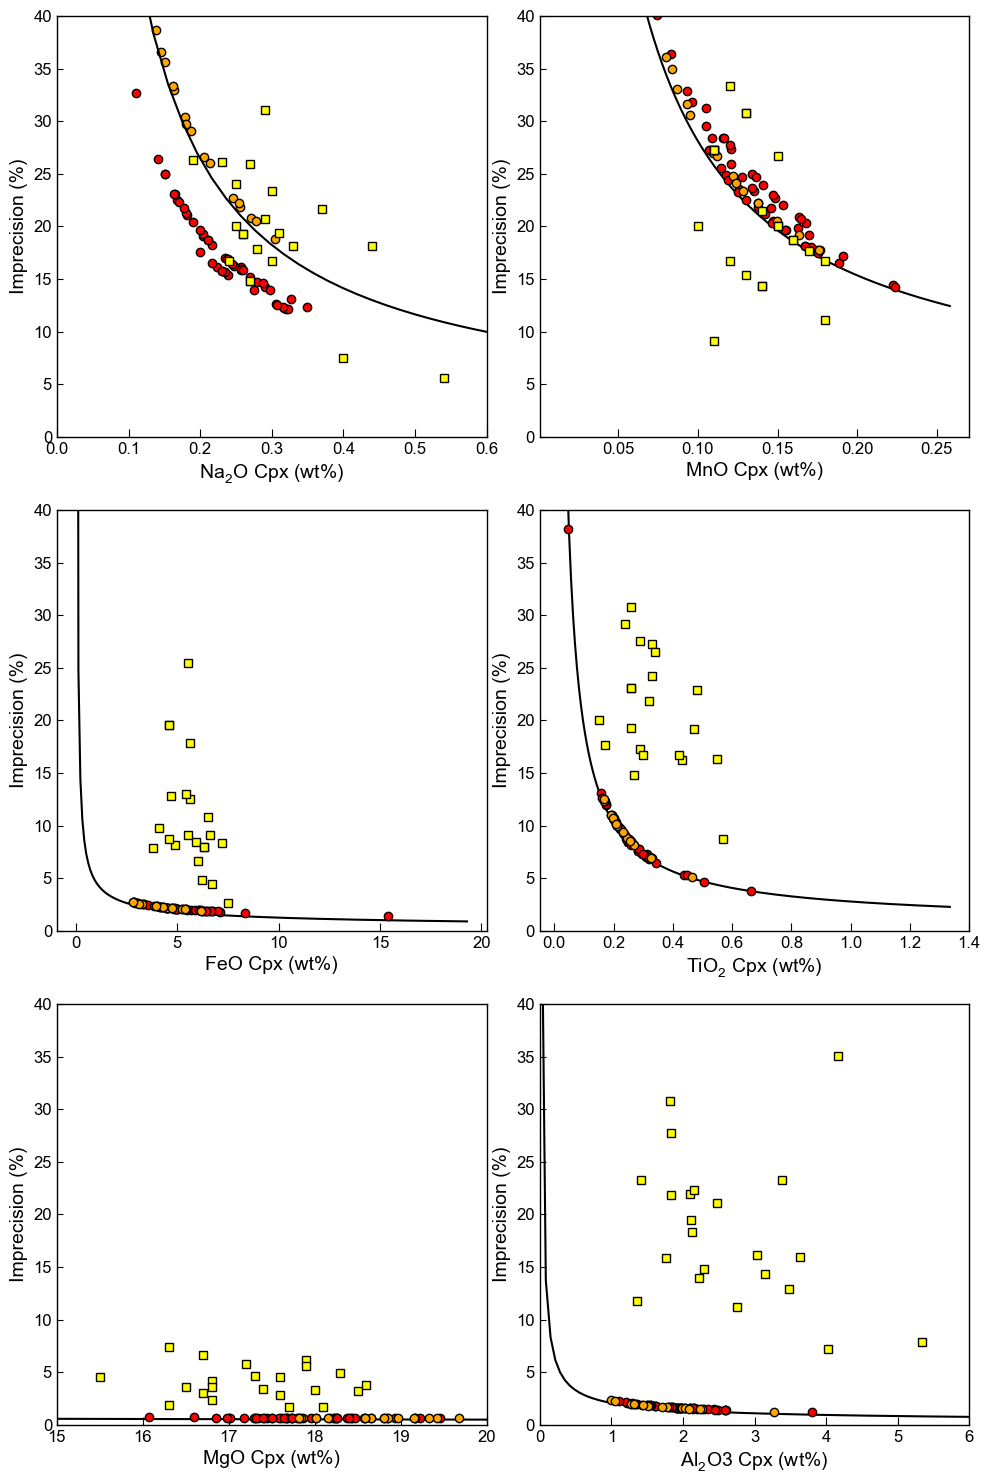

In [42]:
fig, ((ax1, ax6), (ax3, ax4), (ax5, ax2)) = plt.subplots(3, 2, figsize=(10,15),sharey=True)
#ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '--r')
# ax1.plot(LEPR_Stitched['Na2O value'], 
#          100*LEPR_Stitched['Na2O error']/LEPR_Stitched['Na2O value'], '.k', ms=1, alpha=0.8)
ax1.plot(Kraw_07_Cpx_Na['Ox-Wt%'], Kraw_07_Cpx_Na['Error_Per'], 'ok', mfc='r', label='1σ Cpx -JEOL8200 ')
ax1.plot(Kraw_06_Cpx_Na['Ox-Wt%'], Kraw_06_Cpx_Na['Error_Per'], 'ok', mfc='orange', label='1σ Cpx JEOL733')
ax1.plot(Cpx_N5['Na2O'], 100*Cpx_N5['Na2O_Err']/Cpx_N5['Na2O'], 'sk', mfc='yellow', label='1σ, Each Experiment')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '-k', label='Modelled Imprecision Jeol733')

ax1.set_ylim([0, 50])
ax1.set_xlim([0, 0.6])
ax1.set_xlabel('Na$_2$O Cpx (wt%)')
ax1.set_ylabel('Imprecision (%)')

ax2.plot(XAl/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_40s, '-k')
ax2.plot(Kraw_07_Cpx_Al['Ox-Wt%'], Kraw_07_Cpx_Al['Error_Per'], 'ok', mfc='r')
ax2.plot(Kraw_06_Cpx_Al['Ox-Wt%'], Kraw_06_Cpx_Al['Error_Per'], 'ok', mfc='orange')
ax2.plot(Cpx_N5['Al2O3'], 100*Cpx_N5['Al2O3_Err']/Cpx_N5['Al2O3'], 'sk', mfc='yellow')

ax2.set_ylim([0, 40])
ax2.set_xlim([0, 6])
ax2.set_xlabel('Al$_2$O3 Cpx (wt%)')
ax2.set_ylabel('Imprecision (%)')


# ax3.plot(Kraw_07_Cpx_Si['Ox-Wt%'], Kraw_07_Cpx_Si['Error_Per'], 'ok', mfc='r')
# ax3.plot(Kraw_06_Cpx_Si['Ox-Wt%'], Kraw_06_Cpx_Si['Error_Per'], 'ok', mfc='orange')
# ax3.plot(Cpx_N5['SiO2'], 100*Cpx_N5['SiO2_Err']/Cpx_N5['SiO2'], 'sk', mfc='yellow')
# # ax3.set_ylim([0, 40])
# # ax3.set_xlim([0, 6])
# ax3.set_xlabel('SiO$_2$ Cpx (wt%)')
# ax3.set_ylabel('Imprecision (%)')
ax3.plot(XFe/FeO_to_Fe_Factor, 100*EPMA_Kraw_Fe_06_10na_40s, '-k')

ax3.plot(Kraw_07_Cpx_Fe['Ox-Wt%'], Kraw_07_Cpx_Fe['Error_Per'], 'ok', mfc='r')
ax3.plot(Kraw_06_Cpx_Fe['Ox-Wt%'], Kraw_06_Cpx_Fe['Error_Per'], 'ok', mfc='orange')
ax3.plot(Cpx_N5['FeO'], 100*Cpx_N5['FeO_Err']/Cpx_N5['FeO'], 'sk', mfc='yellow')

# ax3.set_ylim([0, 40])
# ax3.set_xlim([0, 6])
ax3.set_xlabel('FeO Cpx (wt%)')
ax3.set_ylabel('Imprecision (%)')

ax4.plot(XTi/TiO2_to_Ti_Factor, 100*EPMA_Kraw_Ti_06_10na_40s, '-k')
ax4.plot(Kraw_07_Cpx_Ti['Ox-Wt%'], Kraw_07_Cpx_Ti['Error_Per'], 'ok', mfc='r')
ax4.plot(Kraw_06_Cpx_Ti['Ox-Wt%'], Kraw_06_Cpx_Ti['Error_Per'], 'ok', mfc='orange')
ax4.plot(Cpx_N5['TiO2'], 100*Cpx_N5['TiO2_Err']/Cpx_N5['TiO2'], 'sk', mfc='yellow')
# ax3.set_ylim([0, 40])
# ax3.set_xlim([0, 6])
ax4.set_xlabel('TiO$_2$ Cpx (wt%)')
ax4.set_ylabel('Imprecision (%)')

ax5.plot(XMg/MgO_to_Mg_Factor, 100*EPMA_Kraw_Mg_06_10na_40s, '-k')
ax5.plot(Kraw_07_Cpx_Mg['Ox-Wt%'], Kraw_07_Cpx_Mg['Error_Per'], 'ok', mfc='r')
ax5.plot(Kraw_06_Cpx_Mg['Ox-Wt%'], Kraw_06_Cpx_Mg['Error_Per'], 'ok', mfc='orange')
ax5.plot(Cpx_N5['MgO'], 100*Cpx_N5['MgO_Err']/Cpx_N5['MgO'], 'sk', mfc='yellow')
# ax3.set_ylim([0, 40])
ax5.set_xlim([15, 20])
ax5.set_xlabel('MgO Cpx (wt%)')
ax5.set_ylabel('Imprecision (%)')

ax6.plot(XMn/MnO_to_Mn_Factor, 100*EPMA_Kraw_Mn_06_10na_40s, '-k')
ax6.plot(Kraw_07_Cpx_Mn['Ox-Wt%'], Kraw_07_Cpx_Mn['Error_Per'], 'ok', mfc='r')
ax6.plot(Kraw_06_Cpx_Mn['Ox-Wt%'], Kraw_06_Cpx_Mn['Error_Per'], 'ok', mfc='orange')
ax6.plot(Cpx_N5['MnO'], 100*Cpx_N5['MnO_Err']/Cpx_N5['MnO'], 'sk', mfc='yellow')
# ax3.set_ylim([0, 40])
# ax3.set_xlim([0, 6])
ax6.set_xlabel('MnO Cpx (wt%)')
ax6.set_ylabel('Imprecision (%)')
handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center',bbox_to_anchor=[0.5, 1.02],  ncol=4)
plt.tight_layout()
ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax6.yaxis.set_tick_params(which='both', labelbottom=True)
ax4.yaxis.set_tick_params(which='both', labelbottom=True)

fig.savefig('SupFig_Analytical_Vs_Experimental_Kraw.png', dpi=200)

### Supplementary Fig. 16 Individual plots Neave

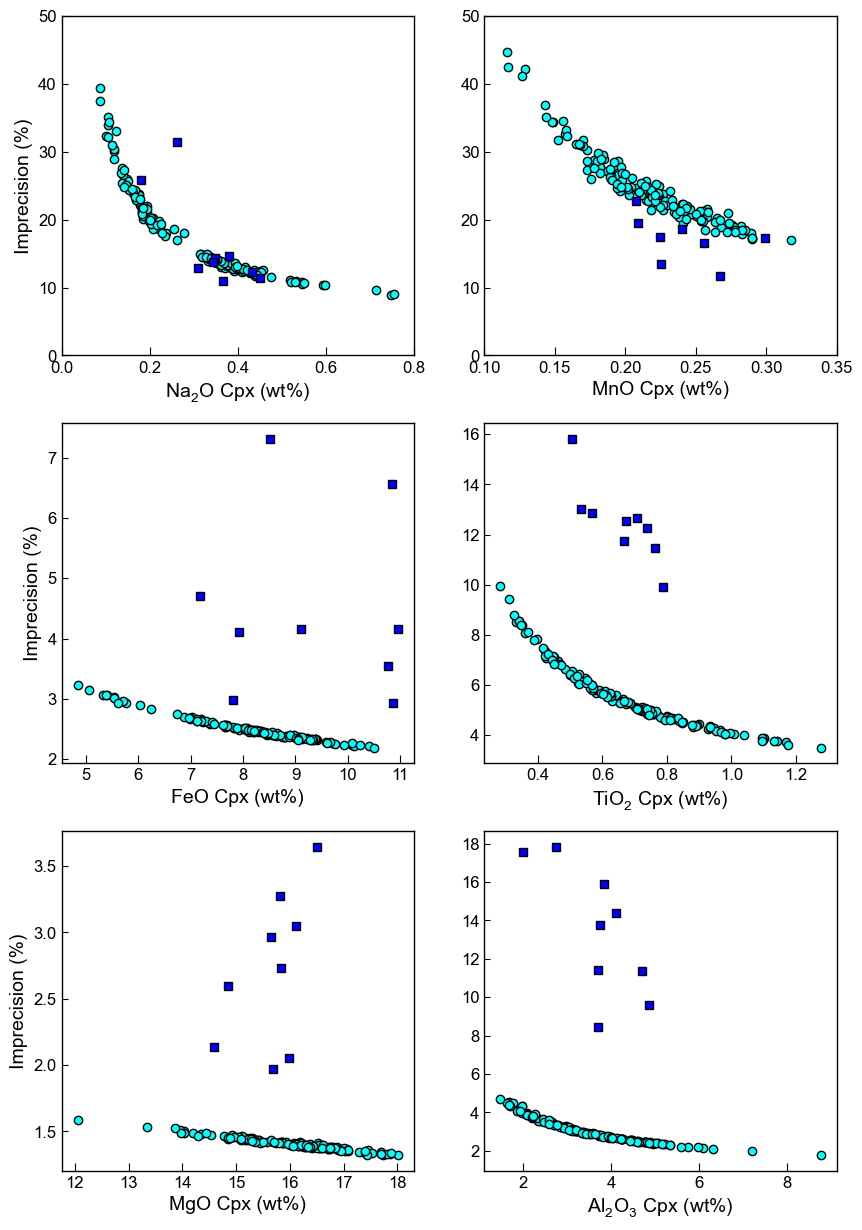

In [43]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,15))
# ax1.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '--r')
# ax1.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_400'], '--b')
# ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '-k', label='Modelled Imprecision Jeol733')

ax1.plot(Neave_sigma_in['Na2O'], Pec_Err_Neave_Na, 'ok', mfc='cyan', label='1s, ind Meas')
ax1.plot(Neave_Exp_Mean['Na2O_Cpx'], Neave_Exp_Prec['Na2O_Cpx'], 'sk', mfc='blue', label='1s, Exp')
ax1.set_ylim([0, 50])
ax1.set_xlim([0, 0.8])
ax1.set_xlabel('Na$_2$O Cpx (wt%)')
ax1.set_ylabel('Imprecision (%)')
#ax1.legend()

ax2.plot(Neave_sigma_in['MnO'], Pec_Err_Neave_Mn, 'ok', mfc='cyan', label='1s, ind Meas')
ax2.plot(Neave_Exp_Mean['MnO_Cpx'], Neave_Exp_Prec['MnO_Cpx'], 'sk', mfc='blue', label='1s, Exp')
ax2.set_ylim([0, 50])
ax2.set_xlim([0.1, 0.35])
ax2.set_xlabel('MnO Cpx (wt%)')
#ax2.set_ylabel('Imprecision (%)')

ax3.plot(Neave_sigma_in['FeOt'], Pec_Err_Neave_Fe, 'ok', mfc='cyan', label='1s, ind Meas')
ax3.plot(Neave_Exp_Mean['FeOt_Cpx'], Neave_Exp_Prec['FeOt_Cpx'], 'sk', mfc='blue', label='1s, Exp')
# ax3.set_ylim([0, 50])
# ax3.set_xlim([0, 0.8])
ax3.set_xlabel('FeO Cpx (wt%)')
ax3.set_ylabel('Imprecision (%)')

ax4.plot(Neave_sigma_in['TiO2'], Pec_Err_Neave_Ti, 'ok', mfc='cyan', label='1s, ind Meas')
ax4.plot(Neave_Exp_Mean['TiO2_Cpx'], Neave_Exp_Prec['TiO2_Cpx'], 'sk', mfc='blue', label='1s, Exp')
# ax4.set_ylim([0, 50])
# ax4.set_xlim([0, 0.8])
ax4.set_xlabel('TiO$_2$ Cpx (wt%)')
#ax4.set_ylabel('Imprecision (%)')

ax5.plot(Neave_sigma_in['MgO'], Pec_Err_Neave_Mg, 'ok', mfc='cyan', label='1s, ind Meas')
ax5.plot(Neave_Exp_Mean['MgO_Cpx'], Neave_Exp_Prec['MgO_Cpx'], 'sk', mfc='blue', label='1s, Exp')
# ax5.set_ylim([0, 50])
# ax5.set_xlim([0.1, 0.35])
ax5.set_xlabel('MgO Cpx (wt%)')
ax5.set_ylabel('Imprecision (%)')


ax6.plot(Neave_sigma_in['Al2O3'], Pec_Err_Neave_Al, 'ok', mfc='cyan', label='1s, ind Meas')
ax6.plot(Neave_Exp_Mean['Al2O3_Cpx'], Neave_Exp_Prec['Al2O3_Cpx'], 'sk', mfc='blue', label='1s, Exp')
# ax6.set_ylim([0, 50])
# ax6.set_xlim([0.1, 0.35])
ax6.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')
#ax6.set_ylabel('Imprecision (%)')
ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax4.yaxis.set_tick_params(which='both', labelbottom=True)
ax6.yaxis.set_tick_params(which='both', labelbottom=True)

fig.savefig('Sup_Fig_Neave_Imprecision.png', dpi=200)

## Compiled figure - Neave, Krawzin, LEPR

## Figure 6 for Paper

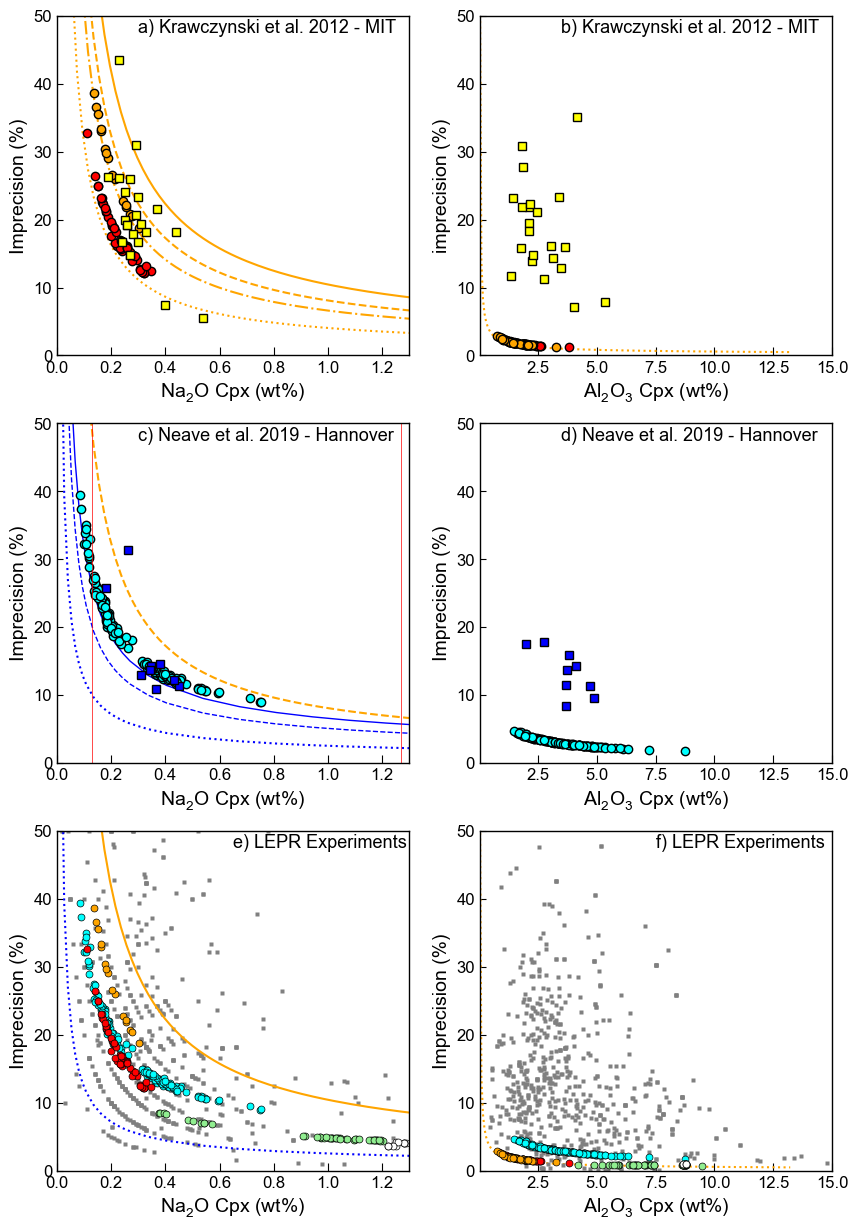

In [32]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,15))
#ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '--r')
# ax1.plot(LEPR_Stitched['Na2O value'], 
#          100*LEPR_Stitched['Na2O error']/LEPR_Stitched['Na2O value'], '.k', ms=1, alpha=0.8)
#ax1.set_title('Krawczynski et al. 2012 - MIT')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_6na_10s, '-', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '--', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '-.', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax1.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_20na_20s, ':', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')

ax1.plot(Kraw_07_Cpx_Na['Ox-Wt%'], Kraw_07_Cpx_Na['Error_Per'], 'ok', mfc='r', label='1σ Cpx analysis JEOL8200 ')
ax1.plot(Kraw_06_Cpx_Na['Ox-Wt%'], Kraw_06_Cpx_Na['Error_Per'], 'ok', mfc='orange', label='1σ Cpx analysis JEOL733')
ax1.plot(Cpx_N5['Na2O'], 100*Cpx_N5['Na2O_Err']/Cpx_N5['Na2O'], 'sk', mfc='yellow', label='1σ Experiment')

ax1.set_ylabel('Imprecision (%)')
ax1.set_xlabel('Na$_2$O Cpx (wt%)')


#ax3.set_title('Neave et al. (2019) - Hannover')
#ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '-b')
ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_400'], ':b')
ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '--b', lw=1)
ax3.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_60'], '-b', lw=1)

ax3.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '--', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')

ax3.plot(Neave_sigma_in['Na2O'], Pec_Err_Neave_Na, 'ok', mfc='cyan', label='1σ Cpx analysis SX100 Hannover')
ax3.plot(Neave_Exp_Mean['Na2O_Cpx'], Neave_Exp_Prec['Na2O_Cpx'], 'sk', mfc='blue', label='1σ Experiment')

ax3.set_xlabel('Na$_2$O Cpx (wt%)')
ax3.set_ylabel('Imprecision (%)')
#ax3.legend()

#ax5.set_title('LEPR vs. analytical Imprecision')
ax5.plot(LEPR_Stitched['Na2O value'], 100*LEPR_Stitched['Na2O error']/LEPR_Stitched['Na2O value'],
         's', mec='none', mfc='grey', ms=3, label='LEPR: 1σ of each Experiment')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_10s, '-k')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_15s, '-k')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_10na_30s, '-.k')
#ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_60'], '-b')
ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_400'], ':b')
#ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_100'], '--b', lw=1)
#ax5.plot(Buse['wt% Na']/Na2O_to_Na_Factor, Buse['Error_60'], ':b', lw=1)

#plt.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Tak_Na_10na_10s/XNa, '-b')
ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_6na_10s,  '-', color='orange')
#ax5.plot(XNa/Na2O_to_Na_Factor, 100*EPMA_Kraw_Na_06_20na_20s_test,  '--', color='orange')
ax3.plot([0.13, 0.13], [0, 50], '-r', lw=0.5)
ax3.plot([1.27, 1.27], [0, 50], '-r', lw=0.5)
ms1=5
mew1=0.5
ax5.plot(Neave_sigma_in['Na2O'], Pec_Err_Neave_Na, 'ok', mfc='cyan', mew=mew1, label='1σ Cpx analysis SX100 Hannover', ms=ms1)
ax5.plot(Kraw_07_Cpx_Na['Ox-Wt%'], Kraw_07_Cpx_Na['Error_Per'], 'ok', mfc='r',mew=mew1, label='1σ Cpx analysis JEOL8200 ', ms=ms1)
ax5.plot(Kraw_06_Cpx_Na['Ox-Wt%'], Kraw_06_Cpx_Na['Error_Per'], 'ok', mfc='orange', mew=mew1,label='1σ Cpx analysis  JEOL733', ms=ms1)
ax5.plot(Gleeson_sigma_Cpx['Na2O_Cpx'], Pec_Err_Na, 'ok', mfc='lightgreen',mew=mew1, label='1σ Cpx analysis SX100 Cam', ms=ms1)
ax5.plot(Tak_sigma_in['Na2O'], Pec_Err_Na_OSU, 'ok', mfc='white', mew=mew1, label='1σ Cpx analysis SX100 OSU', ms=ms1)
rand=np.linspace(0, 290, 30)
#ax5.plot(Mitch['Na2O'].loc[rand],Mitch['Na%ERR'].loc[rand], 'ok', mfc='yellow', ms=4, zorder=0)
# ax5.plot(0.178, 11.1, 'ok', mfc='cornflowerblue',mew=mew1, ms=ms1) # From Blatter, Cpx1
# ax5.plot(0.039, 39.37, 'ok', mfc='cornflowerblue',mew=mew1, ms=ms1) # From Blatter, Kpyrope

ax3.set_ylim([0, 50])
ax3.set_xlim([0, 1.3])
ax5.set_xlabel('Na$_2$O Cpx (wt%)')
ax5.set_ylabel('Imprecision (%)')
#ax5.legend()

### Al2O3
#ax2.set_title('Krawczynski et al. 2012 - MIT')
ax2.plot(XAl/Al2O3_to_Al_Factor, 
         100*EPMA_Kraw_Al_06_10na_40s, ':', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')



ax2.plot(Kraw_07_Cpx_Al['Ox-Wt%'], Kraw_07_Cpx_Al['Error_Per'], 'ok', mfc='r', label='1σ Cpx analysis JEOL8200 ')
ax2.plot(Kraw_06_Cpx_Al['Ox-Wt%'], Kraw_06_Cpx_Al['Error_Per'], 'ok', mfc='orange', label='1σ Cpx analysis JEOL733')
ax2.plot(Cpx_N5['Al2O3'], 100*Cpx_N5['Al2O3_Err']/Cpx_N5['Al2O3'], 'sk', mfc='yellow', label='1σ Experiment')
ax2.set_ylim([0, 50])
ax2.set_xlim([0, 7.5])
ax2.set_ylabel('imprecision (%)')
ax2.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')


#ax4.set_title('Neave et al. (2019) - Hannover')
#ax4.plot(XAl/Al2O3_to_Al_Factor, 
#         100*EPMA_Kraw_Al_06_10na_20s, '-', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')
ax4.plot(Neave_sigma_in['Al2O3'], Pec_Err_Neave_Al, 'ok', mfc='cyan', label='1σ Cpx analysis SX100 Hannover')
ax4.plot(Neave_Exp_Mean['Al2O3_Cpx'], Neave_Exp_Prec['Al2O3_Cpx'], 'sk', mfc='blue', label='1σ Experiment')
ax4.set_ylim([0, 50])
ax4.set_xlim([0, 15])
ax4.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')
ax4.set_ylabel('Imprecision (%)')


#ax6.set_title('LEPR vs. analytical Imprecision')
ax6.plot(XAl/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_40s, ':', color='orange', label='Modelled Imprecision Jeol733 \n 15s 10nA')

ax6.plot(LEPR_Stitched['Al2O3 value'], 100*LEPR_Stitched['Al2O3 error']/LEPR_Stitched['Al2O3 value'],
         's', mec='none', mfc='grey', ms=3, label='LEPR: 1σ of each Experiment')
#ax6.plot(XNa/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_10s, '-k')
#ax6.plot(XNa/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_15s, '-k')
#ax6.plot(XNa/Al2O3_to_Al_Factor, 100*EPMA_Kraw_Al_06_10na_30s, '-.k')
ax6.plot(Neave_sigma_in['Al2O3'], Pec_Err_Neave_Al, 'ok', mfc='cyan', mew=mew1,label='1σ Cpx analysis SX100 Hannover', ms=ms1)
ax6.plot(Kraw_07_Cpx_Al['Ox-Wt%'], Kraw_07_Cpx_Al['Error_Per'], 'ok',mew=mew1, mfc='r', label='1σ Cpx analysis JEOL8200 ', ms=ms1)
ax6.plot(Kraw_06_Cpx_Al['Ox-Wt%'], Kraw_06_Cpx_Al['Error_Per'], 'ok',mew=mew1, mfc='orange', label='1σ Cpx analysis  JEOL733', ms=ms1)
ax6.plot(Gleeson_sigma_Cpx['Al2O3_Cpx'], Pec_Err_Al, 'ok', mfc='lightgreen',mew=mew1, label='1σ Cpx analysis SX100 Cam', ms=ms1)
ax6.plot(Tak_sigma_in['Al2O3'], Pec_Err_Al_OSU, 'ok', mfc='white', mew=mew1, label='1σ Cpx analysis SX100 OSU', ms=ms1)
#ax6.plot(Mitch['Al2O3'].loc[rand],Mitch['Al%ERR'].loc[rand], 'ok', mfc='yellow', ms=4, zorder=0)

#ax6.plot(0.626, 20, 'ok', mfc='cornflowerblue', mew=mew1,ms=ms1)
ax6.set_ylim([0, 50])
ax6.set_xlim([0, 15])
ax6.set_xlabel('Al$_2$O$_3$ Cpx (wt%)')
ax6.set_ylabel('Imprecision (%)')
#plt.tight_layout()

ax1.annotate("a) Krawczynski et al. 2012 - MIT", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax2.annotate("b) Krawczynski et al. 2012 - MIT", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax3.annotate("c) Neave et al. 2019 - Hannover", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax4.annotate("d) Neave et al. 2019 - Hannover", xy=(0.23, 0.95), xycoords="axes fraction", fontsize=13)
ax5.annotate("e) LEPR Experiments", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=13)
ax6.annotate("f) LEPR Experiments", xy=(0.5, 0.95), xycoords="axes fraction", fontsize=13)
## axislimits

ax1.set_ylim([0, 50])
ax1.set_xlim([0, 1.3])
ax3.set_ylim([0, 50])
ax3.set_xlim([0, 1.3])
ax5.set_ylim([0, 50])
ax5.set_xlim([0, 1.3])


ax2.set_ylim([0, 50])
ax2.set_xlim([0.01, 15])
ax4.set_ylim([0, 50])
ax4.set_xlim([0.01, 15])
ax6.set_ylim([0, 50])
ax6.set_xlim([0.01, 15])
fig.savefig('Comboned_Exp_vs_Analytical.png', dpi=200)

#ax1.legend()